Importing the required libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
import warnings
warnings.filterwarnings('ignore')

We're loading the dataset.

In [2]:
data= pd.read_csv(r'C:\Users\lalit\Desktop\Mall_Customers.csv')

checking the basic structure of the data

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


displaying the statistical summary of the data

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Visualization

Creating countplots and histplots of each attribute to understand the pattern of the variables

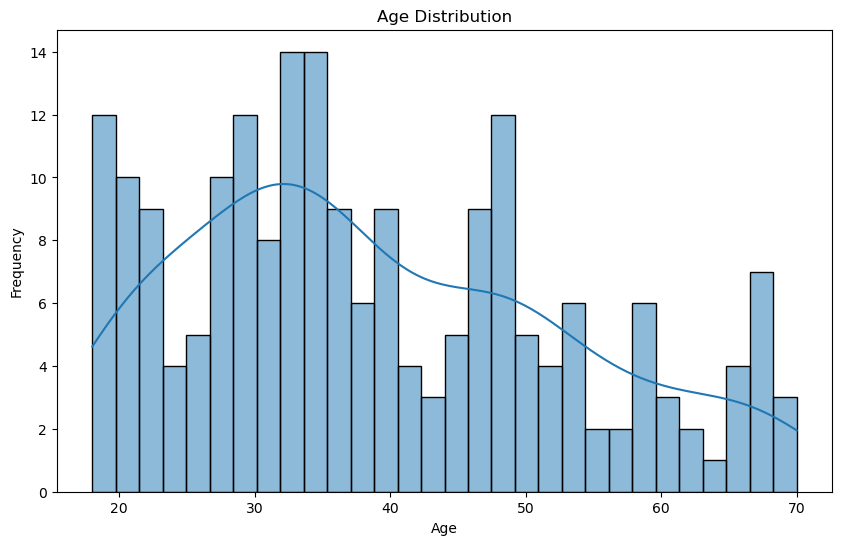

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

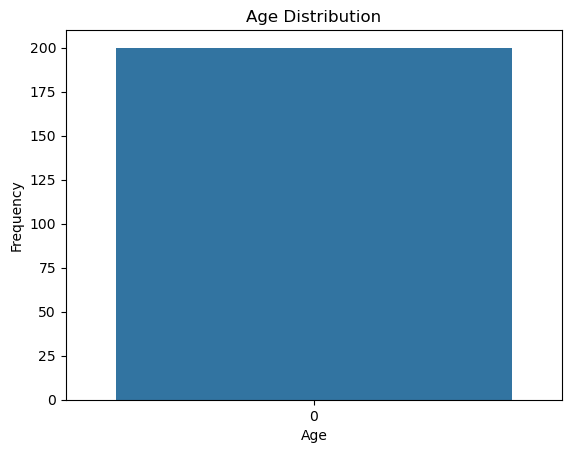

In [10]:
sns.countplot(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

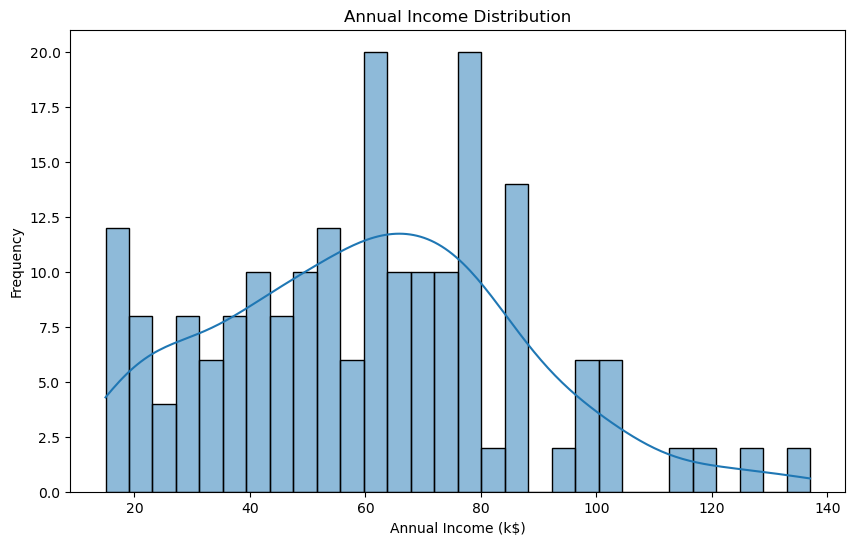

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data['Annual Income (k$)'],kde=True,bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

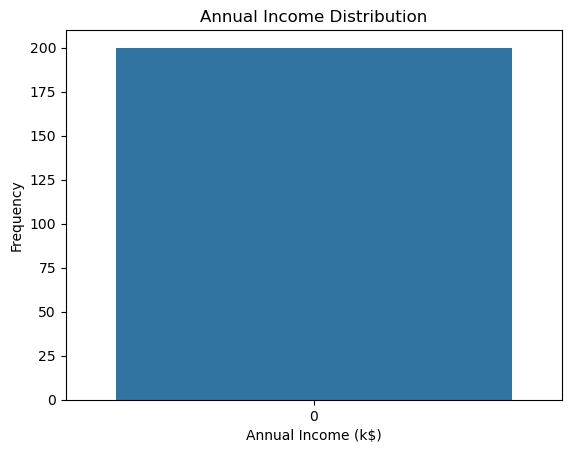

In [13]:
sns.countplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

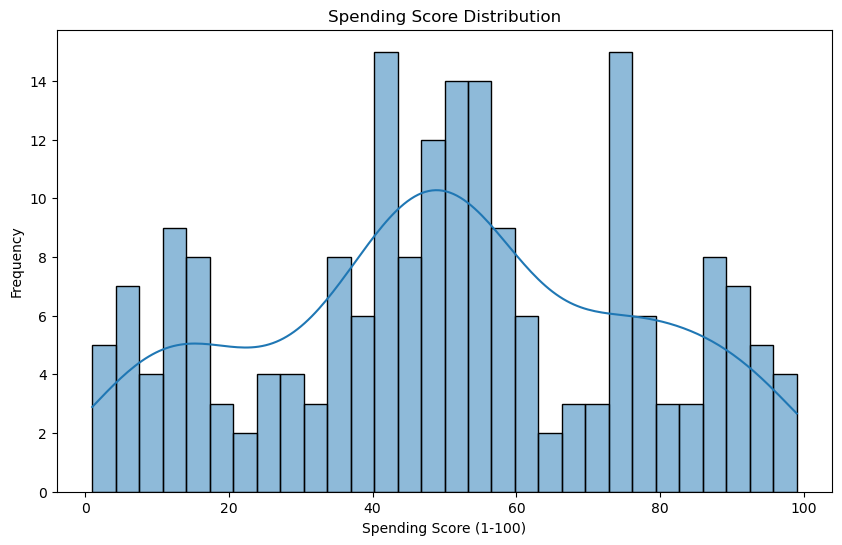

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['Spending Score (1-100)'],kde=True,bins=30)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

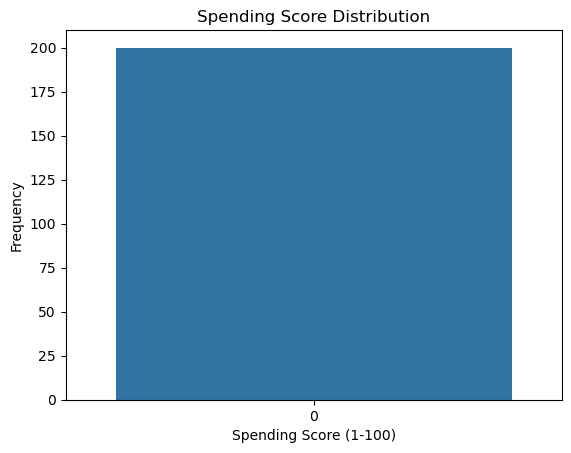

In [15]:
sns.countplot(data['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

Checking the co-relation between the variables by a heatmap

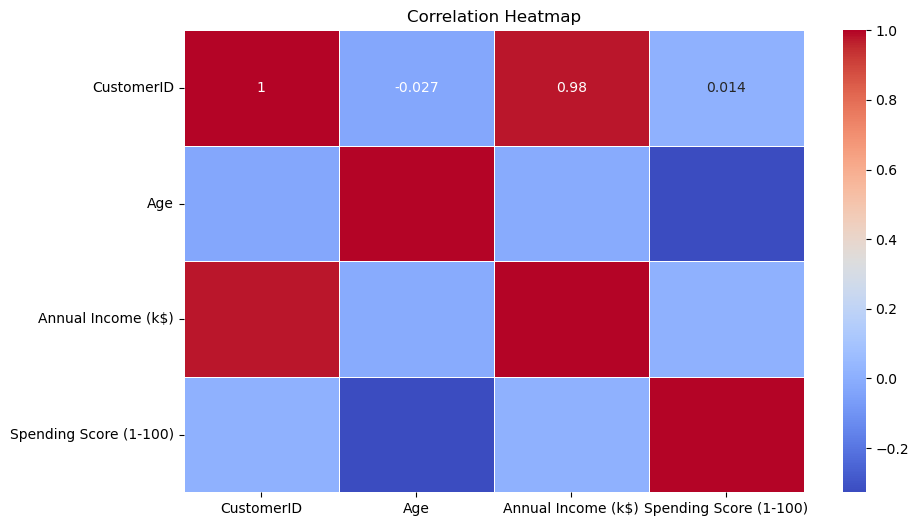

In [16]:
heatmap=data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(heatmap.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Using K-means clustering  we're segmenting the customers based on their income,purchases and spending scores.

In [32]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[['Annual Income (k$)','Spending Score (1-100)']])
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

Plotting the elbow curve/graph

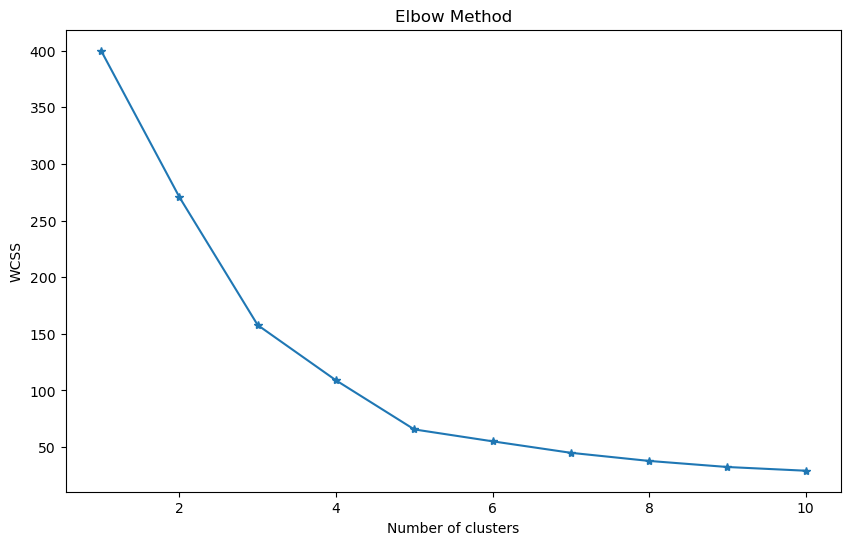

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Applying the k-means and visualising the clusters.

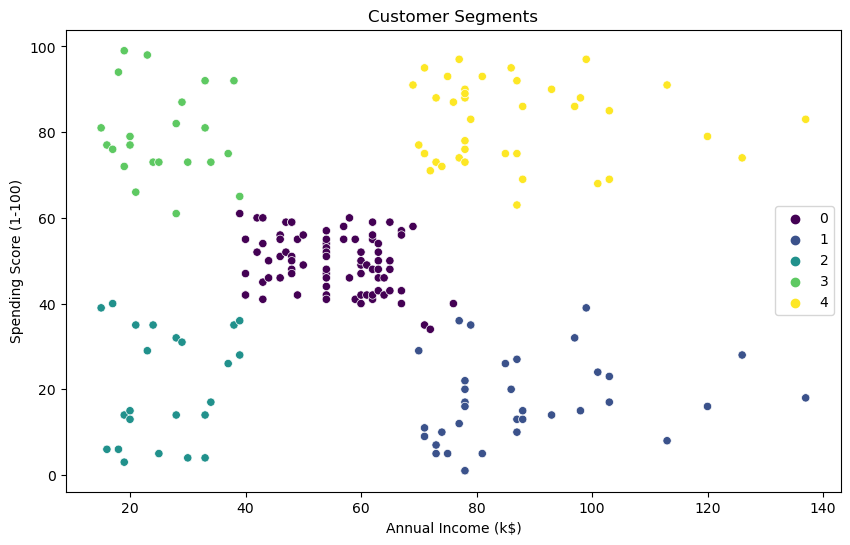

In [33]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=42)
data['Cluster']=kmeans.fit_predict(data_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',data=data,palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Using predictive modelling we're predicting the spending score based on other features

In [43]:
data['High_Spending']=data['Spending Score (1-100)'].apply(lambda x:1 if x>50 else 0)

Splitting and training the data

In [38]:
x=data[['Age','Annual Income (k$)']]
y=data['High_Spending']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Training a logistic model

In [39]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=model.predict(x_test)

Evaluating the model.

In [41]:
accuracy=accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.7166666666666667,
 array([[22, 10],
        [ 7, 21]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.76      0.69      0.72        32\n           1       0.68      0.75      0.71        28\n\n    accuracy                           0.72        60\n   macro avg       0.72      0.72      0.72        60\nweighted avg       0.72      0.72      0.72        60\n')